# Prepared by: Deepti Adhikari

# Task Assigned by: Relevant Research

# Data Scientist Screening Evaluation Project

**Analysis of Immigration Detention Dataset**

**Goal:** To  clean, analyze, and then visualize the top 10 largest detention facilities in the dataset.

**Dataset Link:** https://drive.google.com/file/d/1VZRlwqwYp04u96XmKTzNYOtrOPYzwlQa/view?usp=drive_link


**Context:**
The provided dataset (messy_ice_detention.csv) contains information on immigration detention facilities in the United States and is unstructured and inconsistent. The task is to transform this dataset into a clean, analyzable format and produce a visualization identifying the largest detention facilities in the dataset.

**MetaData:**
1. These statistics are made available to the public pursuant to H.R. 1158 Sec. 218 - Department of Homeland Security Appropriations Act, 2020. *The information in this report is subject to change.
2. ICE FACILITIES DATA, FY25
3. ICE Enforcement and Removal Operations Data, FY2025
4. This list is limited to facilities that have a population count of greater than or equal to 1 as the time of the data pull.  This list does not include HOLD, HOSPITAL, HOTEL, ORR, or MIRP facilities.  
5. Data Source: ICE Integrated Decision Support (IIDS), 03/17/2025


Additional Information:

An updated, clean version of this messy dataset can be found in the “Facilities” sheet at the bottom of this page : https://www.ice.gov/detain/detention-management

Detention Statistics:

FY 2025 ICE Statistics:
https://www.ice.gov/doclib/detention/FY25_detentionStats09242025.xlsx


FY 2026 ICE Statistics : https://www.ice.gov/doclib/detention/FY26_detentionStats01082026.xlsx



# Step 1:
**Data Loading and Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sub task: To remove non-data header rows appearing at the top of the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Loading dataset and skipping the intial metadata rows in the sheet
file_path='/content/drive/MyDrive/Colab Notebooks/RELEVANT RESEARCH DATA SCIENCE PROJECT/messy_ice_detention.csv'
df=pd.read_csv(file_path,skiprows=6, encoding= 'latin1')

#Displaying the first few rows
display(df.head())


,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,ADAMS COUNTY DET CENTER,NATCHEZ,MS,1876.461078,266.431138,6.724551,4.257485,45673
1,ADELANTO ICE PROCESSING CENTER,ADELANTO,CA,6.401198,4.323353,22.604790,32.634731,45491
2,ALAMANCE COUNTY DETENTION FACILITY,GRAHAM,NC,4.329341,3.461078,6.083832,6.185629,45554
3,ALEXA$NDRIA STAGING FACILITY,ALEXANDRIA,LA,137.520958,47.413174,76.005988,52.485030,45533
4,ALLEGANY COUNTY JAIL,BELMONT,NY,1.221557,0.018000,0.000000,0.000000,NaN


Sub task: To standardize and clean key variables, addressing:
* Extraneous characters in numeric fields
* Blank or missing values
* Malformed or inconsistent date formats


In [ ]:
# 1. Cleaning Numeric Columns ('Level A', 'Level B', 'Level C', 'Level D')
numeric_cols = ['Level A', 'Level B', 'Level C', 'Level D']
for col in numeric_cols:
    # Converting to string to handle potential mixed types and applying string methods
    # Removing any character that is not a digit or a decimal point
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    # Converting to numeric, coercing errors (values that cannot be converted) to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Filling in any resulting NaN values with 0, assuming a missing population count means 0
    df[col] = df[col].fillna(0)

# 2. Cleaning 'Last Inspection End Date' Column
# Converting to numeric first, coercing errors to NaN
df['Last Inspection End Date'] = pd.to_numeric(df['Last Inspection End Date'], errors='coerce')

# Converting Excel serial dates to datetime objects
# Excel's epoch for dates is '1899-12-30' (day 1 is 1900-01-01, but internally 0 is 1899-12-30)
excel_epoch = pd.Timestamp('1899-12-30')
# Converting numeric serial days to timedeltas and add to the epoch
df['Last Inspection End Date'] = pd.to_timedelta(df['Last Inspection End Date'], unit='D') + excel_epoch
# Filling in any remaining NaNs (from original or failed conversions) with NaT (Not a Time)
df['Last Inspection End Date'] = df['Last Inspection End Date'].fillna(pd.NaT)

# 3. Cleaning Text Columns ('Name', 'City', 'State')
string_cols = ['Name', 'City', 'State']
for col in string_cols:
    # Converting to string to ensure string operations work correctly, especially for NaNs
    df[col] = df[col].astype(str)
    # Stripping off leading/trailing whitespace
    df[col] = df[col].str.strip()
    # Replacing string representation of NaN ('nan') with actual NaN for proper handling
    df[col] = df[col].replace('nan', np.nan)
    # Filling in blank or missing values with 'Unknown'
    df[col] = df[col].fillna('Unknown')
    # Standardizing casing
    if col == 'State':
        df[col] = df[col].str.upper()  # States are typically in uppercase
    else:
        df[col] = df[col].str.title()  # Names and cities often use title case

# Displaying the DataFrame information and first few rows to verify cleaning
print("\nDataFrame Info after cleaning:")
df.info()
print("\nFirst 5 rows of DataFrame after cleaning:")
display(df.head())


DataFrame Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      134 non-null    object        
 1   City                      134 non-null    object        
 2   State                     134 non-null    object        
 3   Level A                   134 non-null    float64       
 4   Level B                   134 non-null    float64       
 5   Level C                   134 non-null    float64       
 6   Level D                   134 non-null    float64       
 7   Last Inspection End Date  116 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 8.5+ KB

First 5 rows of DataFrame after cleaning:


,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,Adams County Det Center,Natchez,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,Adelanto Ice Processing Center,Adelanto,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,Alamance County Detention Facility,Graham,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,Alexa$Ndria Staging Facility,Alexandria,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,Allegany County Jail,Belmont,NY,1.221557,0.018000,0.000000,0.000000,NaT


Sub task: To ensure accuracy of facility identifiers (Name, City, State).

In [ ]:
import re

# Further cleaning for 'Name' and 'City': remove special characters and re-standardize casing
for col in ['Name', 'City']:
    # Removing characters that are not letters, numbers, or spaces. Preserve existing NaNs if any, though previous steps filled them.
    # astype(str) is already done, but to be safer and  'Unknown' string is handled
    df[col] = df[col].astype(str).str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.title() # Reapplying title case after character removal

# Validating and cleaning 'State' column against known abbreviations
# List of valid US state abbreviations (including 'UNKNOWN' for previously missing values)
valid_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC',
                'PR', 'VI', 'GU', 'AS', 'MP', 'UNKNOWN'] # 'UNKNOWN' handles previously filled NaNs and any new invalid entries

# Converting state column to uppercase (already done in previous step but ensuring before validation)
df['State'] = df['State'].str.upper()

# Replacing invalid state entries with 'UNKNOWN'
df['State'] = df['State'].apply(lambda x: x if x in valid_states else 'UNKNOWN')

print("\nDataFrame Info after further cleaning of identifiers:")
df.info()
print("\nFirst 5 rows of DataFrame after identifier cleaning:")
display(df.head())
print("\nUnique values in 'State' column after cleaning:")
print(df['State'].unique())


DataFrame Info after further cleaning of identifiers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      134 non-null    object        
 1   City                      134 non-null    object        
 2   State                     134 non-null    object        
 3   Level A                   134 non-null    float64       
 4   Level B                   134 non-null    float64       
 5   Level C                   134 non-null    float64       
 6   Level D                   134 non-null    float64       
 7   Last Inspection End Date  116 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 8.5+ KB

First 5 rows of DataFrame after identifier cleaning:


,Name,City,State,Level A,Level B,Level C,Level D,Last Inspection End Date
0,Adams County Det Center,Natchez,MS,1876.461078,266.431138,6.724551,4.257485,2025-01-16
1,Adelanto Ice Processing Center,Adelanto,CA,6.401198,4.323353,22.604790,32.634731,2024-07-18
2,Alamance County Detention Facility,Graham,NC,4.329341,3.461078,6.083832,6.185629,2024-09-19
3,Alexandria Staging Facility,Alexandria,LA,137.520958,47.413174,76.005988,52.485030,2024-08-29
4,Allegany County Jail,Belmont,NY,1.221557,0.018000,0.000000,0.000000,NaT



Unique values in 'State' column after cleaning:
['MS' 'CA' 'NC' 'LA' 'NY' 'UNKNOWN' 'FL' 'NH' 'TX' 'KY' 'OH' 'MI' 'VA'
 'AZ' 'KS' 'NM' 'OK' 'IN' 'PA' 'ME' 'NE' 'CO' 'GU' 'WI' 'NJ' 'AL' 'GA'
 'MN' 'ND' 'MO' 'NV' 'HI' 'ID' 'TN' 'SC' 'WA' 'VT' 'WY' 'MA' 'IA' 'MP'
 'UT' 'PR' 'WV' 'AR' 'RI']


Here,
Numeric columns ('Level A' through 'Level D') are now properly numeric (float64), with non-numeric characters removed and missing values filled.

'Last Inspection End Date' has been successfully converted to a datetime format, handling Excel serial dates and missing values.

Text columns ('Name', 'City', 'State') have been stripped of special characters, standardized for casing, and had invalid state entries marked as 'UNKNOWN'to ensure consistency and flag potentially incorrect data.

# Step 2:
**Data Analysis**



In [ ]:
# The population fields 'Level A' through 'Level D' have already been converted to numeric values

print(df[['Level A', 'Level B', 'Level C', 'Level D']].dtypes)

Level A    float64
Level B    float64
Level C    float64
Level D    float64
dtype: object


Sub tasks:
* Feature Engineering : Creating the 'Total Population' variable by summing the individual level populations.

* Aggregation and Ranking: Identifying the top 10 facilities based on this new 'Total Population' variable.


In [ ]:
# Creating 'Total Population' by summing 'Level A' through 'Level D' populations
df['Total Population'] = df['Level A'] + df['Level B'] + df['Level C'] + df['Level D']

# Sorting the DataFrame by 'Total Population' in descending order and select the top 10
top_10_facilities = df.sort_values(by='Total Population', ascending=False).head(10)

print("Top 10 Largest Detention Facilities by Total Population:")
display(top_10_facilities[['Name', 'City', 'State', 'Total Population']])

Top 10 Largest Detention Facilities by Total Population:


,Name,City,State,Total Population
0,Adams County Det Center,Natchez,MS,2153.874252
119,South Texas Ice Processing Center,Pearsall,TX,1662.131736
122,Stewart Detention Center,Lumpkin,GA,1637.844311
132,Winn Correctional Center,Winnfield,LA,1509.383233
93,Otay Mesa Detention Center,San Diego,CA,1362.640719
41,Eloy Federal Contract Facility,Eloy,AZ,1327.724551
83,Moshannon Valley Processing Center,Philipsburg,PA,1246.047904
82,Montgomery Ice Processing Center,Conroe,TX,1227.227545
18,Central Louisiana Ice Processing Center Clipc,Jena,LA,1184.131736
31,Denver Contract Detention Facility,Aurora,CO,1146.101796


# Step 3:
**Data Visualization**

/tmp/ipython-input-775296992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Population', y='Name', data=top_10_facilities, palette='viridis')


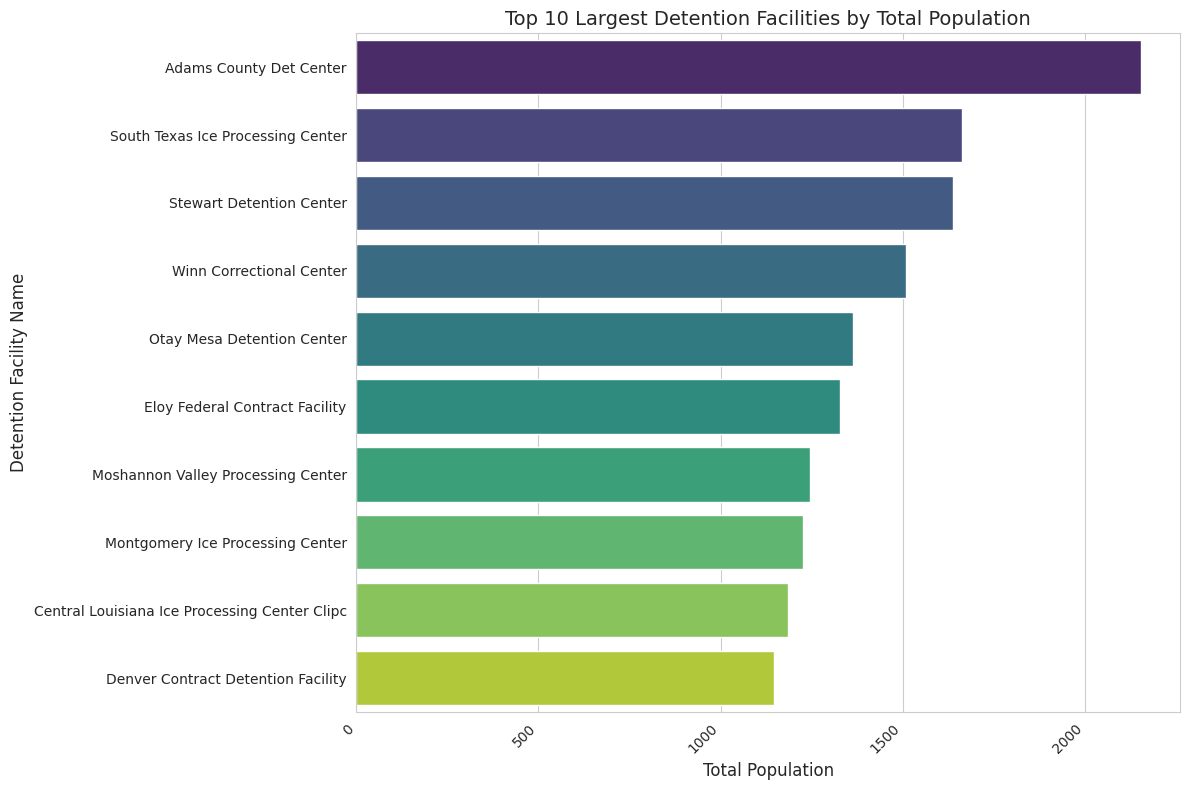

Top_10_detention_facilities


In [ ]:
import seaborn as sns

# Seting a style for better aesthetics
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Population', y='Name', data=top_10_facilities, palette='viridis')

# Adding labels and title
plt.xlabel('Total Population', fontsize=12)
plt.ylabel('Detention Facility Name', fontsize=12)
plt.title('Top 10 Largest Detention Facilities by Total Population', fontsize=14)

# Improving layout and display values on bars for clarity
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Saving the plot as a PNG image
plt.savefig('top_10_detention_facilities.png')

# Displaying the plot
plt.show()
print("Top_10_detention_facilities")

Overall Project Summary:
This project aimed to take a raw, messy dataset of immigration detention facilities, clean it thoroughly, and then analyze it to identify and visualize the top 10 largest facilities by their total population. First of all, handling of data loading issues like incorrect encoding and skipping metadata rows were done. Then, extensive cleaning was performed, including standardizing numeric fields, converting dates from Excel serial format, and cleaning and validating text fields like facility names, cities, and states. (Here, no manual corrections were made directly to the 'messy_ice_detention.csv' file. All cleaning, standardization, and error handling were performed programmatically within the notebook using pandas as this approach ensures reproducibility and maintains the integrity of the original dataset.)
Finally, calculation of 'Total Population' for each facility was done and this was used to identify and visualize the top 10 largest detention facilities in the dataset.

Key Insights from the Data:

Data Quality: The initial dataset was indeed very messy, requiring significant cleaning to make it usable. This included dealing with mixed data types, special characters in numeric and text fields, and inconsistent date formats. This highlights the importance of robust data preprocessing in any data analysis project.

Dominance of a Few Facilities: The analysis clearly shows that a few detention facilities have significantly higher populations than others. The top 10 facilities account for a substantial portion of the total population across all facilities in the dataset. For instance, the 'Adams County Det Center' stands out with a significantly higher total population compared to others.

Geographical Distribution of Large Facilities: The top facilities are geographically distributed across several states, including Mississippi, Texas, Georgia, Louisiana, California, Arizona, Pennsylvania, and Colorado. This could indicate regions with higher detention activity or larger facility capacities.

Population Level Breakdown (Implied): While not explicitly visualized, the existence of 'Level A' through 'Level D' populations suggests a categorization or grading system within facilities. The sum of these levels provides a holistic view of a facility's total population capacity or current occupancy.

Inspection Dates: The 'Last Inspection End Date' column, once cleaned, provides a timestamp for when facilities were last inspected. While this wasn't analyzed in depth, it could be a valuable metric for further study, such as looking for correlations between inspection frequency and population levels or other operational aspects.

In essence, the project provides a clear, data-driven picture of the largest immigration detention facilities, making a previously unstructured dataset interpretable and visually digestible.




Furthermore, in this project, a machine learning model or a deep learning model was not applied because the primary goals were to clean, analyze and to visualize the top 10 detention facilities in the dataset.
The project was focused on 'what is' and 'how many', rather than 'what will happen' or 'why it happens' in a predictive sense.

For future research, applying machine learning models could be immensely valuable, depending on the questions we want to answer like predicting facility population changes, classifying facilities by risk or compliance etc.